In [1]:
!pip install pandas matplotlib seaborn openpyxl

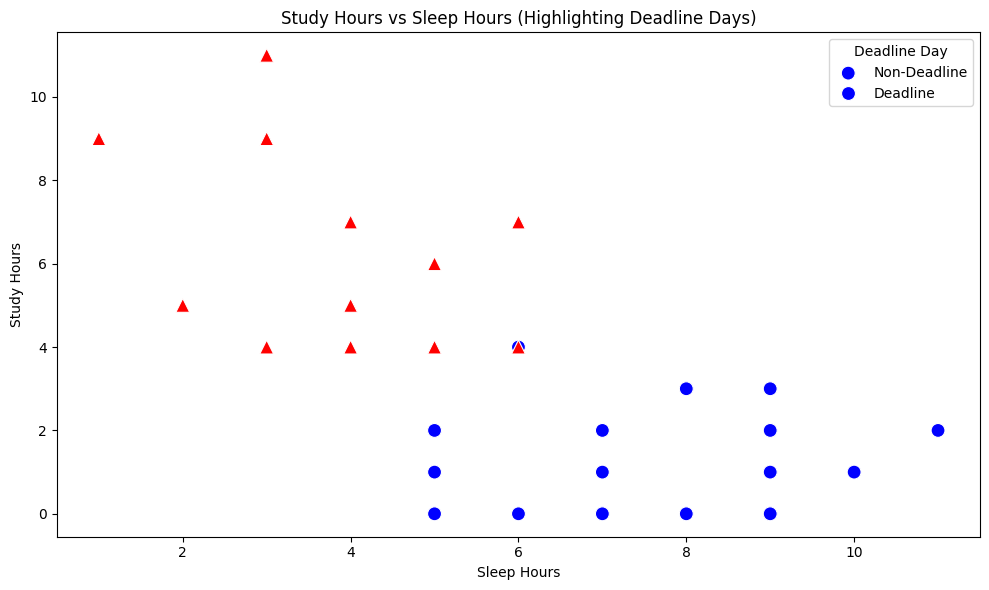

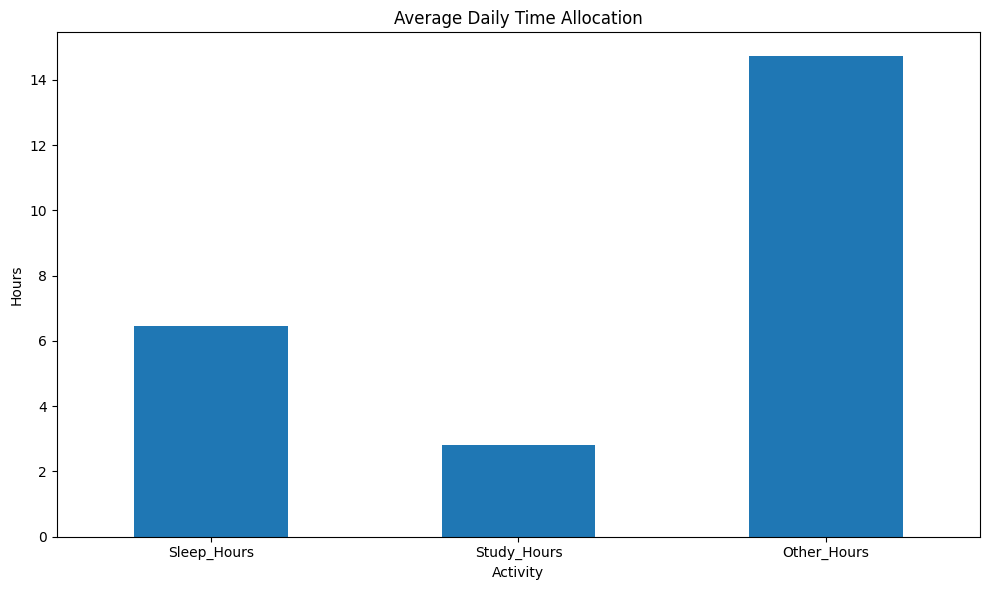

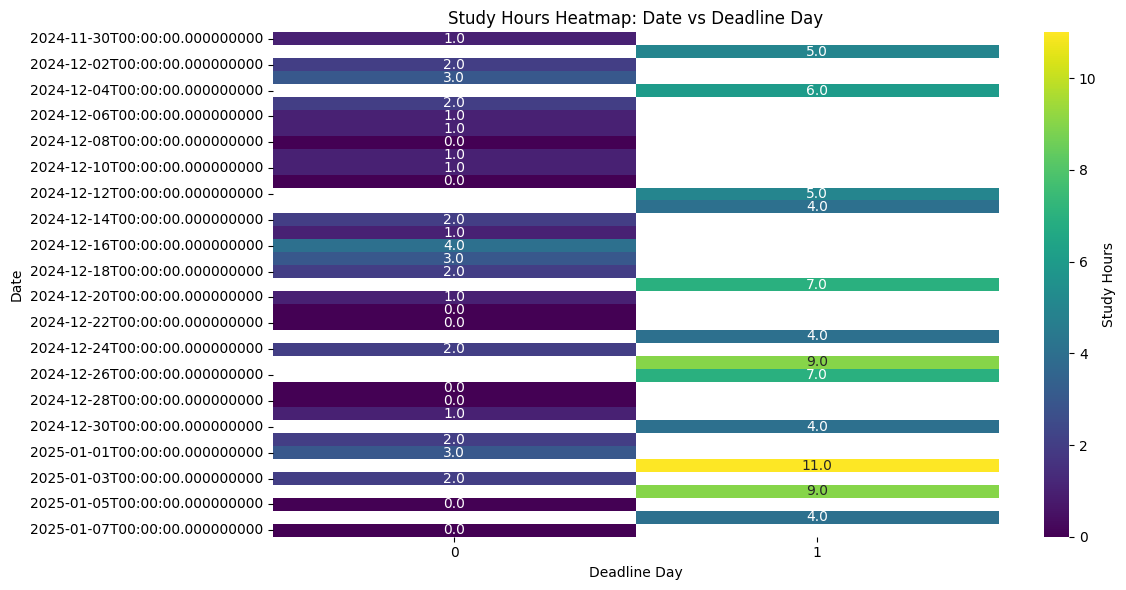

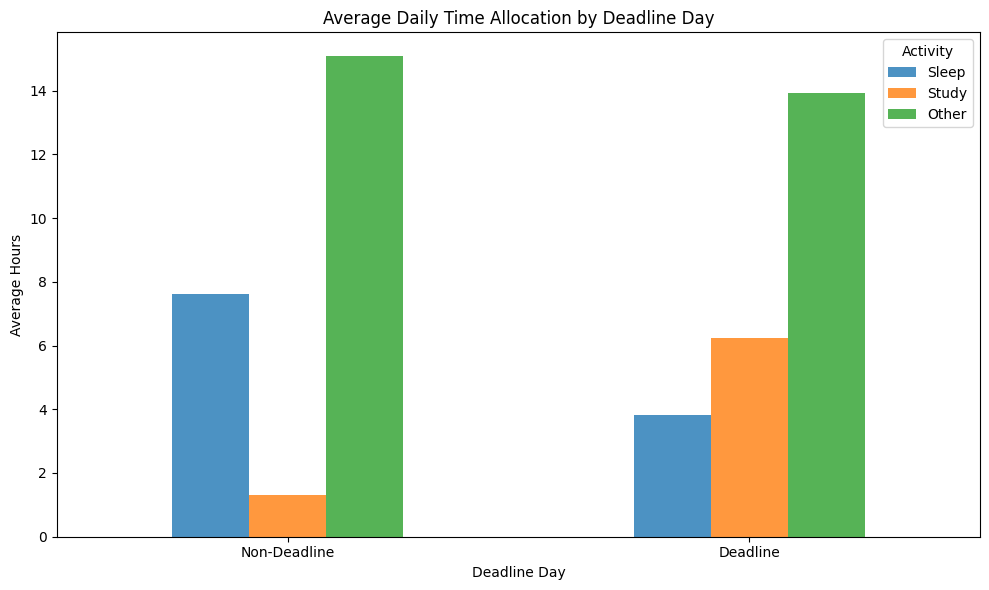

<ipython-input-11-ed0ec26792f8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Deadline_Day", y="Study_Hours", palette="coolwarm")


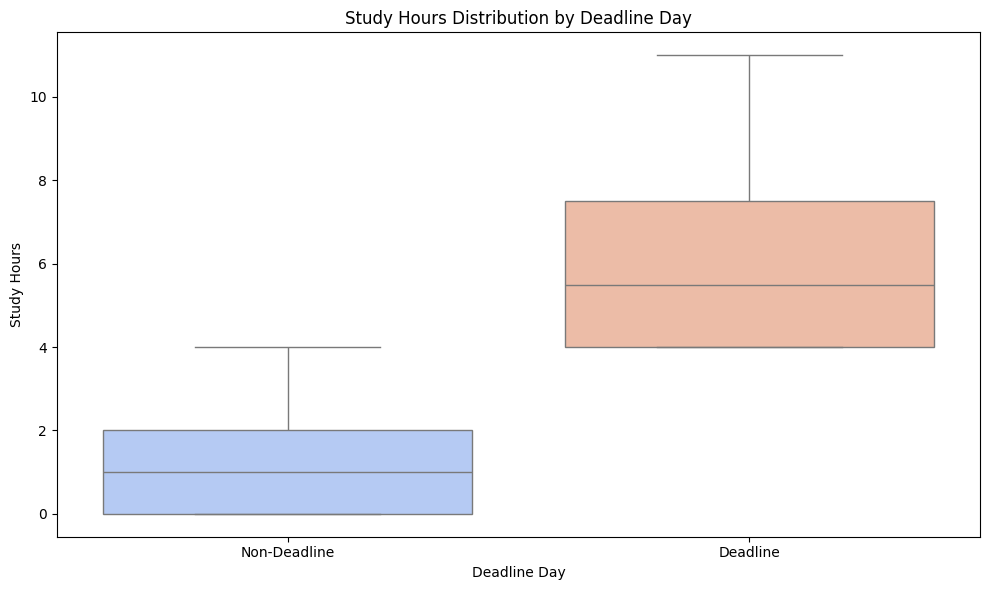

<ipython-input-11-ed0ec26792f8>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Deadline_Day", y="Sleep_Hours", inner="quartile", palette="muted")


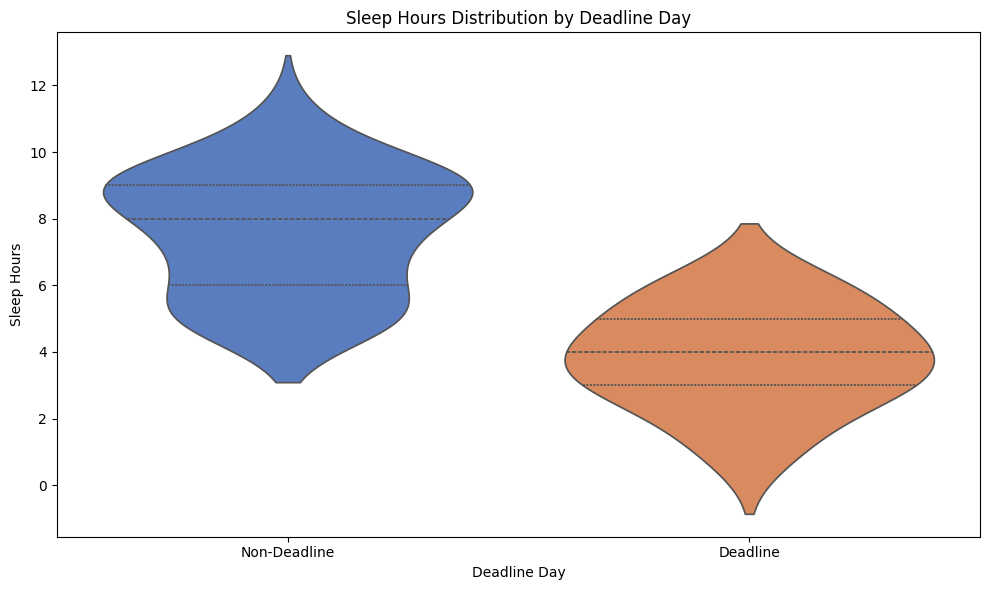

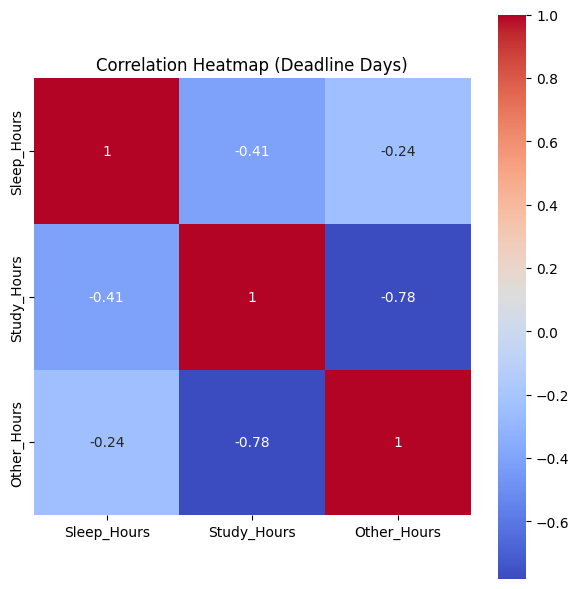

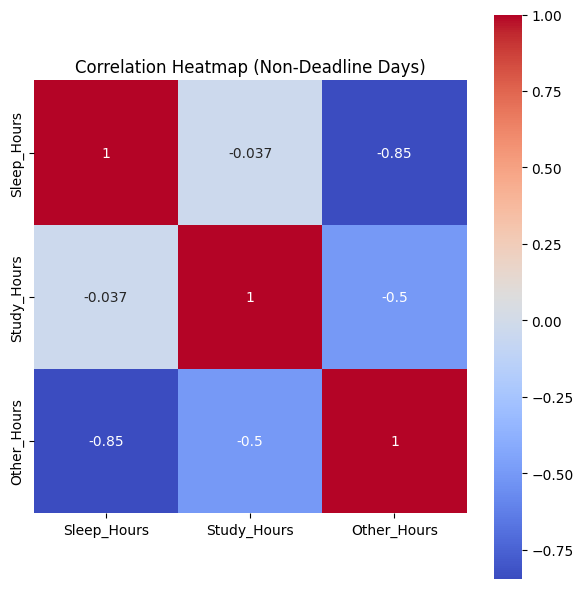

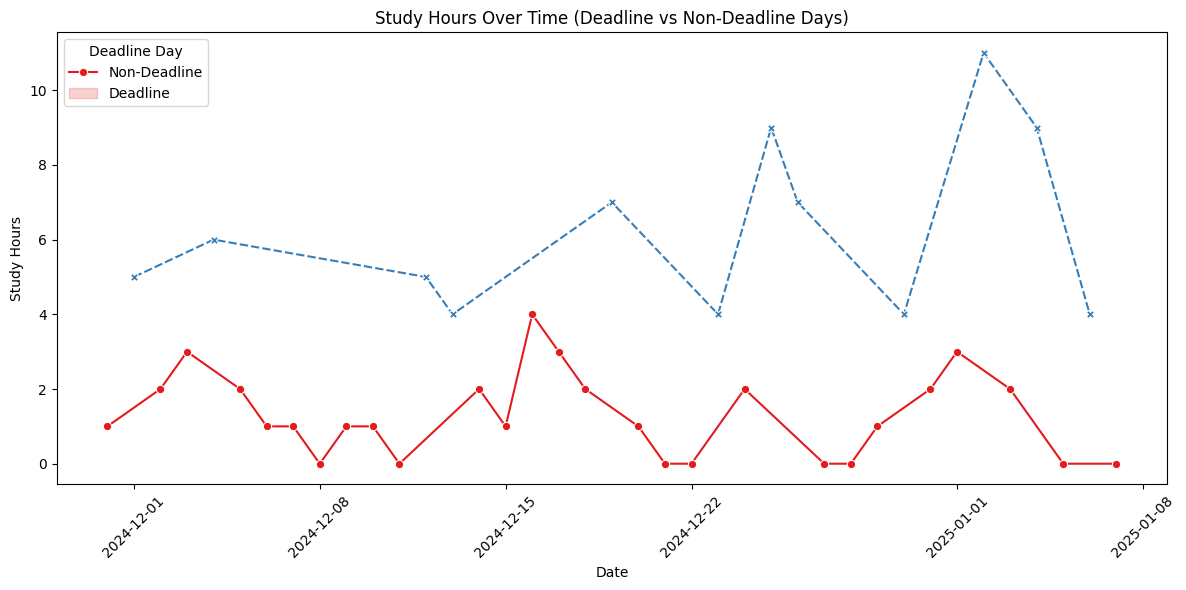

In [11]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace 'data.xlsx' with the path to your Excel file)
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Visualization 1: Study hours vs Sleep hours with custom markers for deadlines
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Sleep_Hours",
    y="Study_Hours",
    hue="Deadline_Day",
    style="Deadline_Day",
    palette={1: "red", 0: "blue"},
    markers={1: "^", 0: "o"},
    s=100  # Adjust marker size
)
plt.title("Study Hours vs Sleep Hours (Highlighting Deadline Days)")
plt.xlabel("Sleep Hours")
plt.ylabel("Study Hours")
plt.legend(title="Deadline Day", labels=["Non-Deadline", "Deadline"], loc="upper right")
plt.tight_layout()
plt.show()


# Visualization 2: Average daily study, sleep, and other hours
avg_hours = df[["Sleep_Hours", "Study_Hours", "Other_Hours"]].mean()
avg_hours.plot(kind='bar', figsize=(10, 6))
plt.title("Average Daily Time Allocation")
plt.ylabel("Hours")
plt.xlabel("Activity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization 3: Heatmap of study hours by date and deadline day
pivot = df.pivot(index="Date", columns="Deadline_Day", values="Study_Hours")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Study Hours'})
plt.title("Study Hours Heatmap: Date vs Deadline Day")
plt.xlabel("Deadline Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()


# Group by deadline and calculate average hours
avg_hours_by_deadline = df.groupby("Deadline_Day")[["Sleep_Hours", "Study_Hours", "Other_Hours"]].mean()

# Bar chart
avg_hours_by_deadline.plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("Average Daily Time Allocation by Deadline Day")
plt.ylabel("Average Hours")
plt.xlabel("Deadline Day")
plt.xticks(ticks=[0, 1], labels=["Non-Deadline", "Deadline"], rotation=0)
plt.legend(["Sleep", "Study", "Other"], title="Activity")
plt.tight_layout()
plt.show()



# Box plot to show variation in study hours
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Deadline_Day", y="Study_Hours", palette="coolwarm")
plt.title("Study Hours Distribution by Deadline Day")
plt.xlabel("Deadline Day")
plt.ylabel("Study Hours")
plt.xticks(ticks=[0, 1], labels=["Non-Deadline", "Deadline"])
plt.tight_layout()
plt.show()


# Violin plot for sleep vs study time
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Deadline_Day", y="Sleep_Hours", inner="quartile", palette="muted")
plt.title("Sleep Hours Distribution by Deadline Day")
plt.xlabel("Deadline Day")
plt.ylabel("Sleep Hours")
plt.xticks(ticks=[0, 1], labels=["Non-Deadline", "Deadline"])
plt.tight_layout()
plt.show()



# Select relevant numeric columns for correlation calculation
columns_to_include = ["Sleep_Hours", "Study_Hours", "Other_Hours"]
numeric_columns = df[columns_to_include]

# Calculate correlation for deadline and non-deadline days separately
correlation_deadline = numeric_columns[df["Deadline_Day"] == 1].corr()
correlation_non_deadline = numeric_columns[df["Deadline_Day"] == 0].corr()

# Heatmap for deadline days (3x3)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_deadline, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Deadline Days)")
plt.tight_layout()
plt.show()

# Heatmap for non-deadline days (3x3)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_non_deadline, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Non-Deadline Days)")
plt.tight_layout()
plt.show()




# Line plot for study hours over time, with separate lines for deadlines and non-deadlines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Study_Hours", hue="Deadline_Day", style="Deadline_Day", markers=True, palette="Set1")
plt.title("Study Hours Over Time (Deadline vs Non-Deadline Days)")
plt.xlabel("Date")
plt.ylabel("Study Hours")
plt.legend(title="Deadline Day", labels=["Non-Deadline", "Deadline"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


